<a href="https://colab.research.google.com/github/CD-AC/DataScience-Prediction_Models_HR/blob/main/DataScience_Prediction_Models_HR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMPLOYEE RESIGNATION PREDICTION

## Introduction


---


In this article, a predictive analysis is presented regarding the potential resignation of employees. The main objective is to develop three prediction models using machine learning techniques to identify employees who may be considering leaving the company in the near future. This analysis aims to assist companies in taking proactive measures to retain their key talent and improve job satisfaction.

## Research


---


### Cost of Hiring an Employee in 2024

This article analyzes the average cost per hire in the year 2024 and the factors influencing this cost.

#### Average Cost per Hire

- **2019:** $4,129

- **2023:** $4,700 (14% increase)

#### Factors Influencing Cost

1. **Company Size:** Larger companies can spread operational costs among a greater number of hires.
2. **Industry:** Certain industries, such as cybersecurity, engineering, or nursing, experience talent shortages, increasing hiring costs.
3. **Location:** Hiring costs vary by geographic location.

### Types of Costs

#### Direct Costs

- **Recruitment:** Job postings, recruitment agency fees, candidate tracking software.
- **Selection:** Tests, interviews, candidate travel.
- **Onboarding:** Training, materials, existing employee time.

#### Indirect Costs

- **Employee Time:** Time employees spend on the hiring process, such as reviewing resumes and conducting interviews.
- **Productivity Loss:** Productivity loss incurred when a position is vacant.
- **Turnover Costs:** Costs associated with hiring a new employee to replace a departing one.

This analysis provides a deeper understanding of the cost of hiring an employee in 2024 and the different factors influencing this cost. Understanding these aspects is crucial for strategic decision-making in human resource management and financial planning for companies.

Source: https://toggl.com/blog/cost-of-hiring-an-employee

## Data and Methodology


---


### Dataset

The data used in this analysis were obtained from https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset, containing relevant employee information, including demographic characteristics, employment history, performance evaluations, among others.

### Data Preprocessing

Before training predictive models, an exhaustive data preprocessing process was performed, including data cleaning, handling categorical variables, managing missing values, and feature scaling.

## Development of Predictive Model
---
### Feature Selection

The most relevant categorical variables for predicting employee resignations were carefully selected. Various machine learning methodologies were explored and evaluated, including Random Forest, Logistic Regression, and Deep Learning. Each of these techniques was applied with the aim of capturing the complexity and diversity of the data, thus providing a comprehensive approach to building three robust and accurate predictive models.

### Model Training

Several machine learning models, including Logistic Regression, Random Forests, and Deep Learning, were trained using the training dataset.

## Model Evaluation
---
The models were evaluated using metrics such as accuracy, recall, and F1-score. A detailed analysis of the confusion matrix was conducted to assess the model's performance in predicting employee resignations.






# Exploratory Data Analysis

## Import Libreries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf

## Import Dataset

In [ ]:
employee_df = pd.read_csv('Dataset_HHRR.csv')

In [ ]:
employee_df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


## Dataset Info


In [ ]:
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## Dataset Describe

In [ ]:
employee_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## Dataset Values NULL

<Axes: >

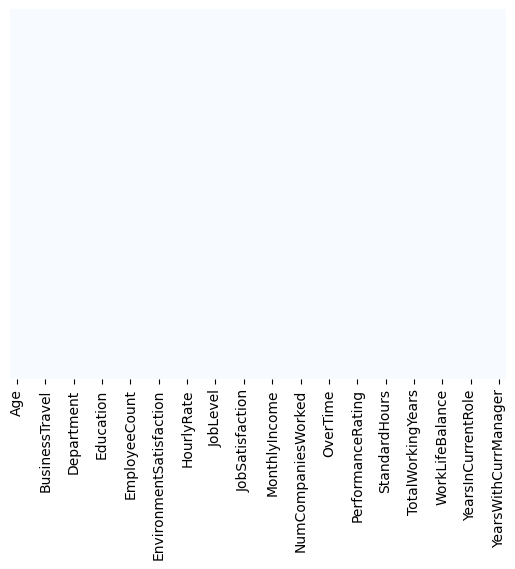

In [ ]:
sns.heatmap(employee_df.isnull(), yticklabels= False, cbar= False, cmap= "Blues")

# Dataset Visualization

In [ ]:
# Replace the 'Attritition', 'Over18', 'overtime' columns with integers before we can perform any visualization.
employee_df['Attrition'] = employee_df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
employee_df['Over18'] = employee_df['Over18'].apply(lambda x: 1 if x == 'Y' else 0)
employee_df['OverTime'] = employee_df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
employee_df.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_df.drop(["EmployeeCount", "StandardHours", "Over18", "EmployeeNumber"], axis= 1, inplace= True)

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Attrition'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>,
        <Axes: title={'center': 'JobSatisfaction'}>],
       [<Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'OverTime'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axes: title={'center': 'TotalWorkingYears'}>,
        <Axes: tit

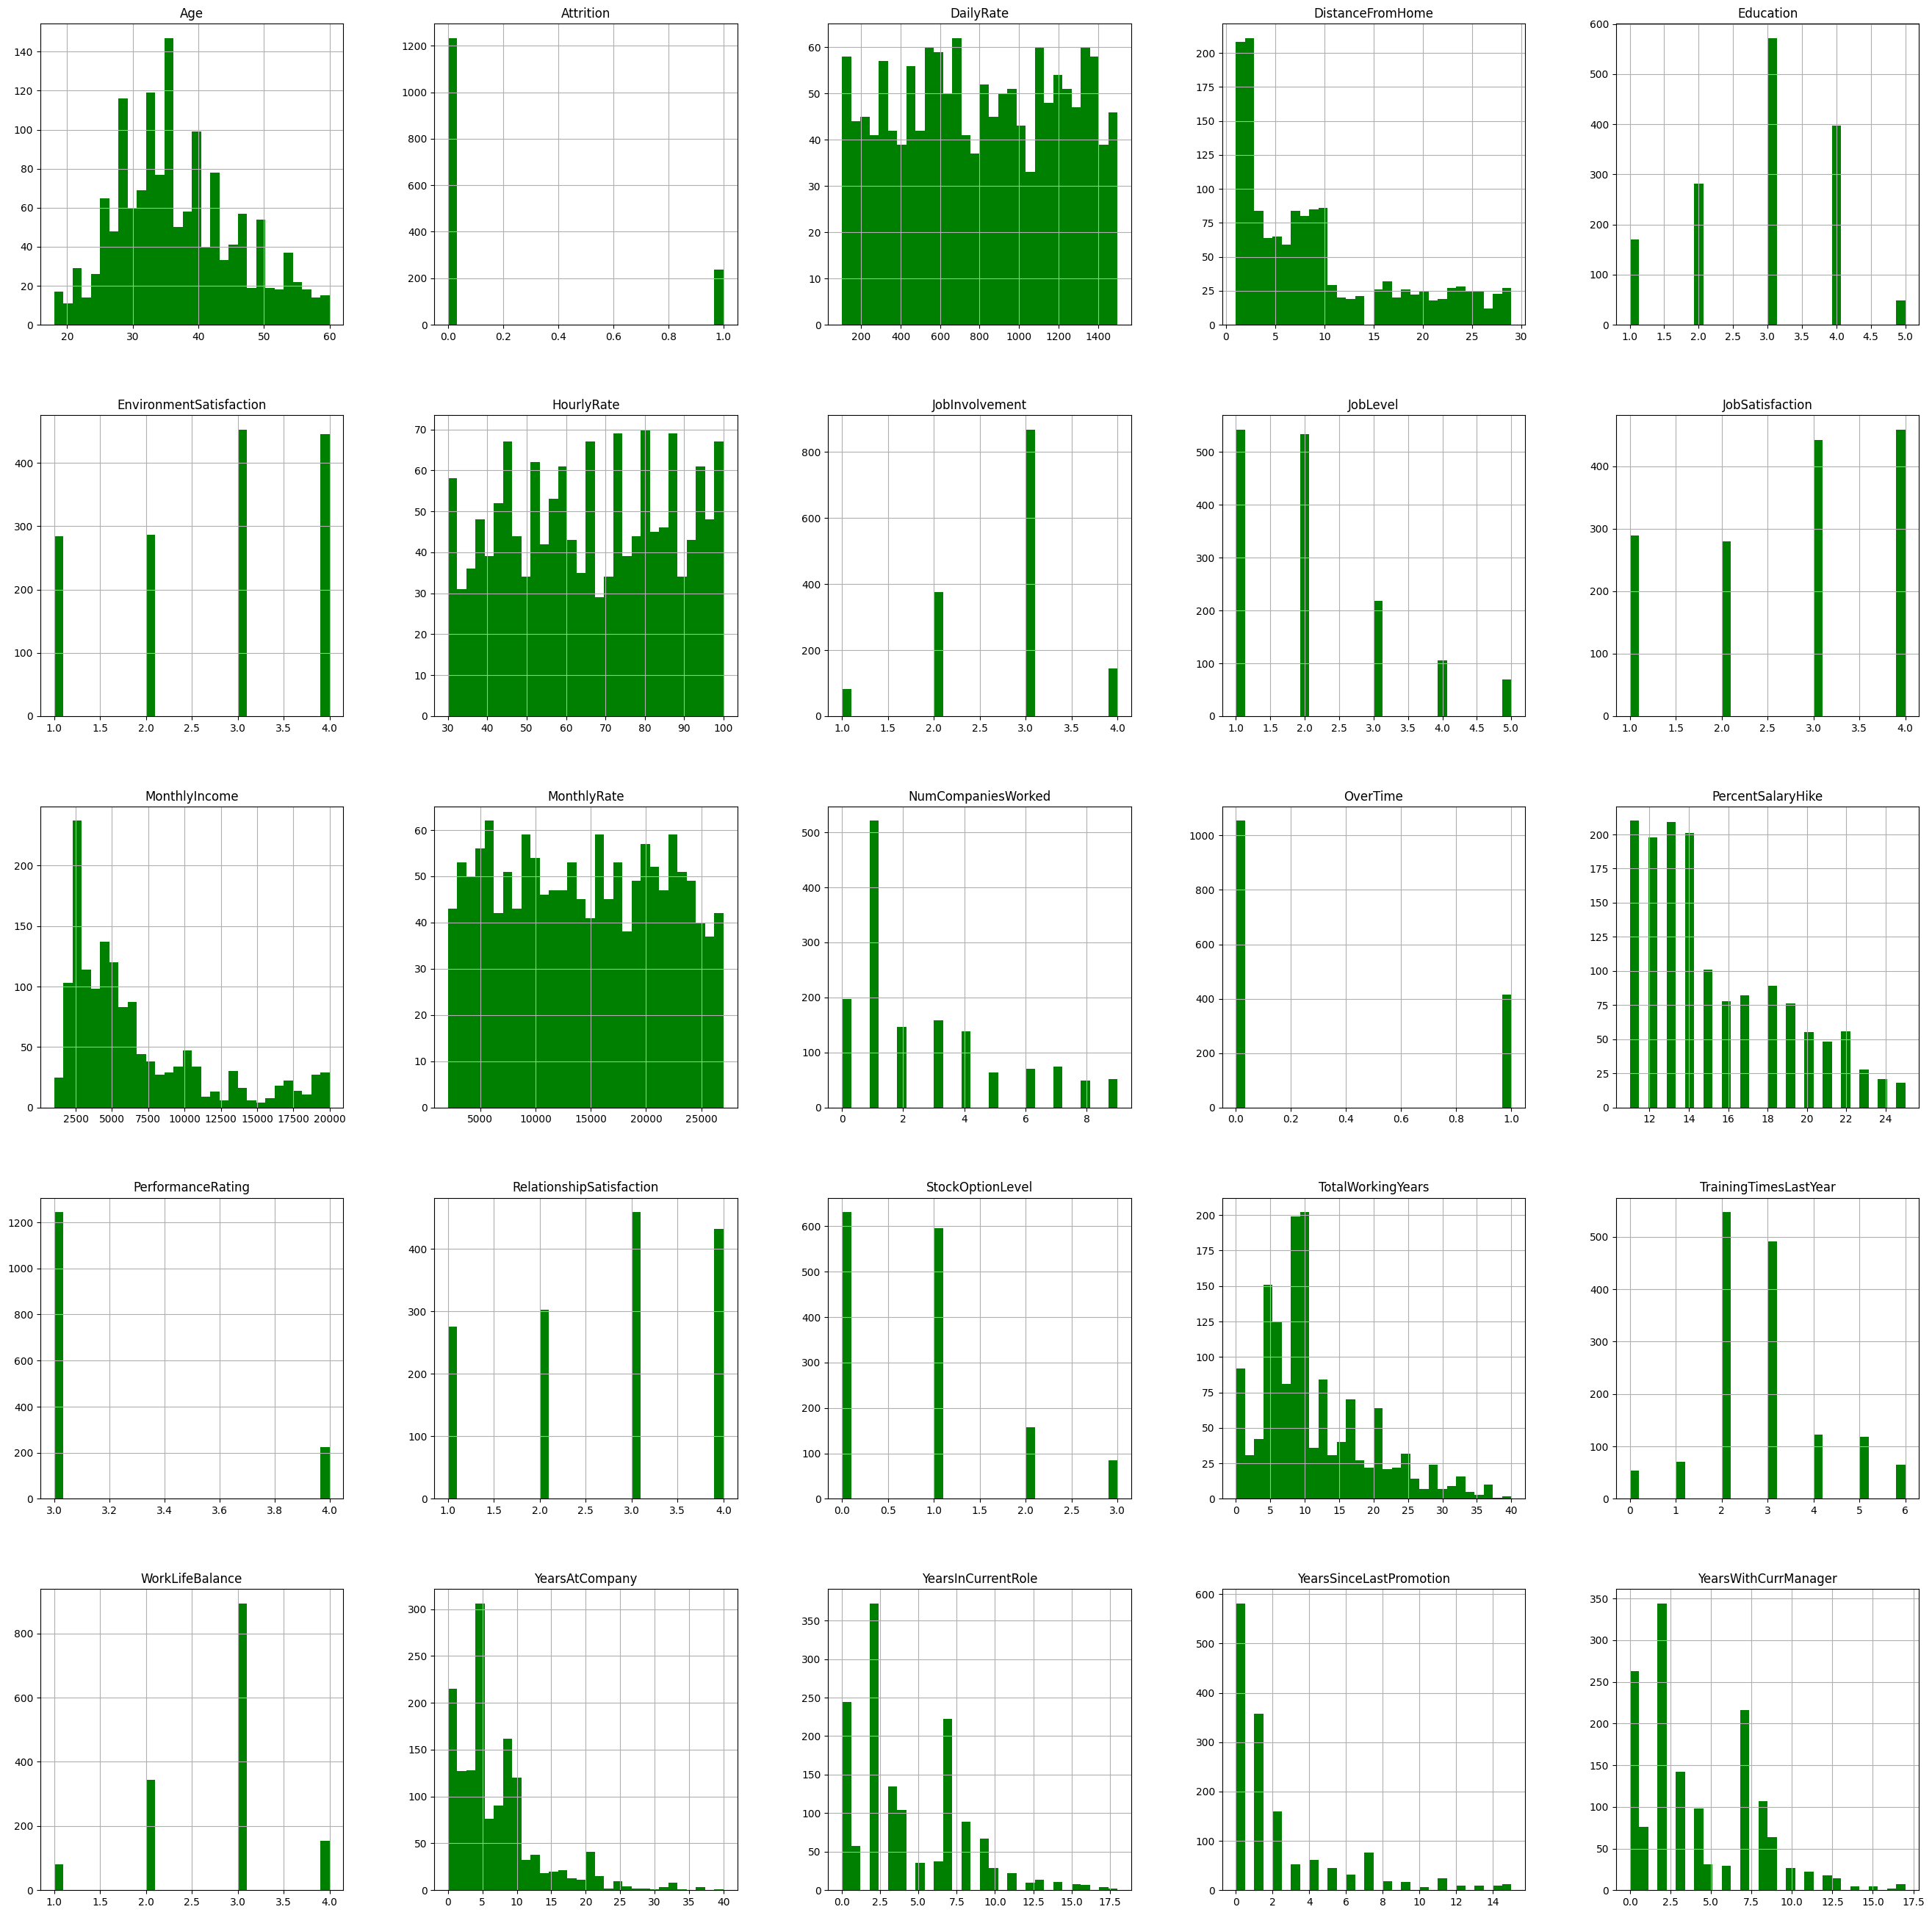

In [ ]:
employee_df.hist(bins = 30, figsize=(33, 33), color = 'g')

In [ ]:
# Number of employees leaving the company
left_df = employee_df[employee_df['Attrition'] == 1]
stayed_df = employee_df[employee_df['Attrition'] == 0]

In [ ]:
print("Total number of employees = ", len(employee_df))
print("Number of employees leaving the company = ", len(left_df))
print("Number of employees who remain in the company = ", len(stayed_df))
print("Percentage of employees who leave the company = ", 1.*len(left_df)/len(employee_df)*100.00, "%")
print("Percentage of employees who remain in the company = ", 1.*len(stayed_df)/len(employee_df)*100.00, "%")

Total number of employees =  1470
Number of employees leaving the company =  237
Number of employees who remain in the company =  1233
Percentage of employees who leave the company =  16.122448979591837 %
Percentage of employees who remain in the company =  83.87755102040816 %


In [ ]:
# Let's compare the mean and standard error of employees who will stay and those who may quit.
# Analyzing the columns Age ,DailyRate, DistanceFromHome, EvironmentSatisfaction, StockOptionLevel
left_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,237.000000,237.0,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,...,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000,237.000000
mean,33.607595,1.0,750.362869,10.632911,2.839662,2.464135,65.573840,2.518987,1.637131,2.468354,...,3.156118,2.599156,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321
std,9.689350,0.0,401.899519,8.452525,1.008244,1.169791,20.099958,0.773405,0.940594,1.118058,...,0.363735,1.125437,0.856361,7.169204,1.254784,0.816453,5.949984,3.174827,3.153077,3.143349
min,18.000000,1.0,103.000000,1.000000,1.000000,1.000000,31.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,28.000000,1.0,408.000000,3.000000,2.000000,1.000000,50.000000,2.000000,1.000000,1.000000,...,3.000000,2.000000,0.000000,3.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,32.000000,1.0,699.000000,9.000000,3.000000,3.000000,66.000000,3.000000,1.000000,3.000000,...,3.000000,3.000000,0.000000,7.000000,2.000000,3.000000,3.000000,2.000000,1.000000,2.000000
75%,39.000000,1.0,1092.000000,17.000000,4.000000,4.000000,84.000000,3.000000,2.000000,3.000000,...,3.000000,4.000000,1.000000,10.000000,3.000000,3.000000,7.000000,4.000000,2.000000,5.000000
max,58.000000,1.0,1496.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,15.000000,15.000000,14.000000


In [ ]:
stayed_df.describe()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1233.000000,1233.0,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,...,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000,1233.000000
mean,37.561233,0.0,812.504461,8.915653,2.927007,2.771290,65.952149,2.770479,2.145985,2.778589,...,3.153285,2.733982,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
std,8.888360,0.0,403.208379,8.012633,1.027002,1.071132,20.380754,0.692050,1.117933,1.093277,...,0.360408,1.071603,0.841985,7.760719,1.293585,0.681907,6.096298,3.649402,3.234762,3.594116
min,18.000000,0.0,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,0.0,477.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.0,817.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,6.000000,3.000000,1.000000,3.000000
75%,43.000000,0.0,1176.000000,13.000000,4.000000,4.000000,83.000000,3.000000,3.000000,4.000000,...,3.000000,4.000000,1.000000,16.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,0.0,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,3.000000,38.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


Text(0.5, 1.0, 'Correlation Heatmap in Employee Data')

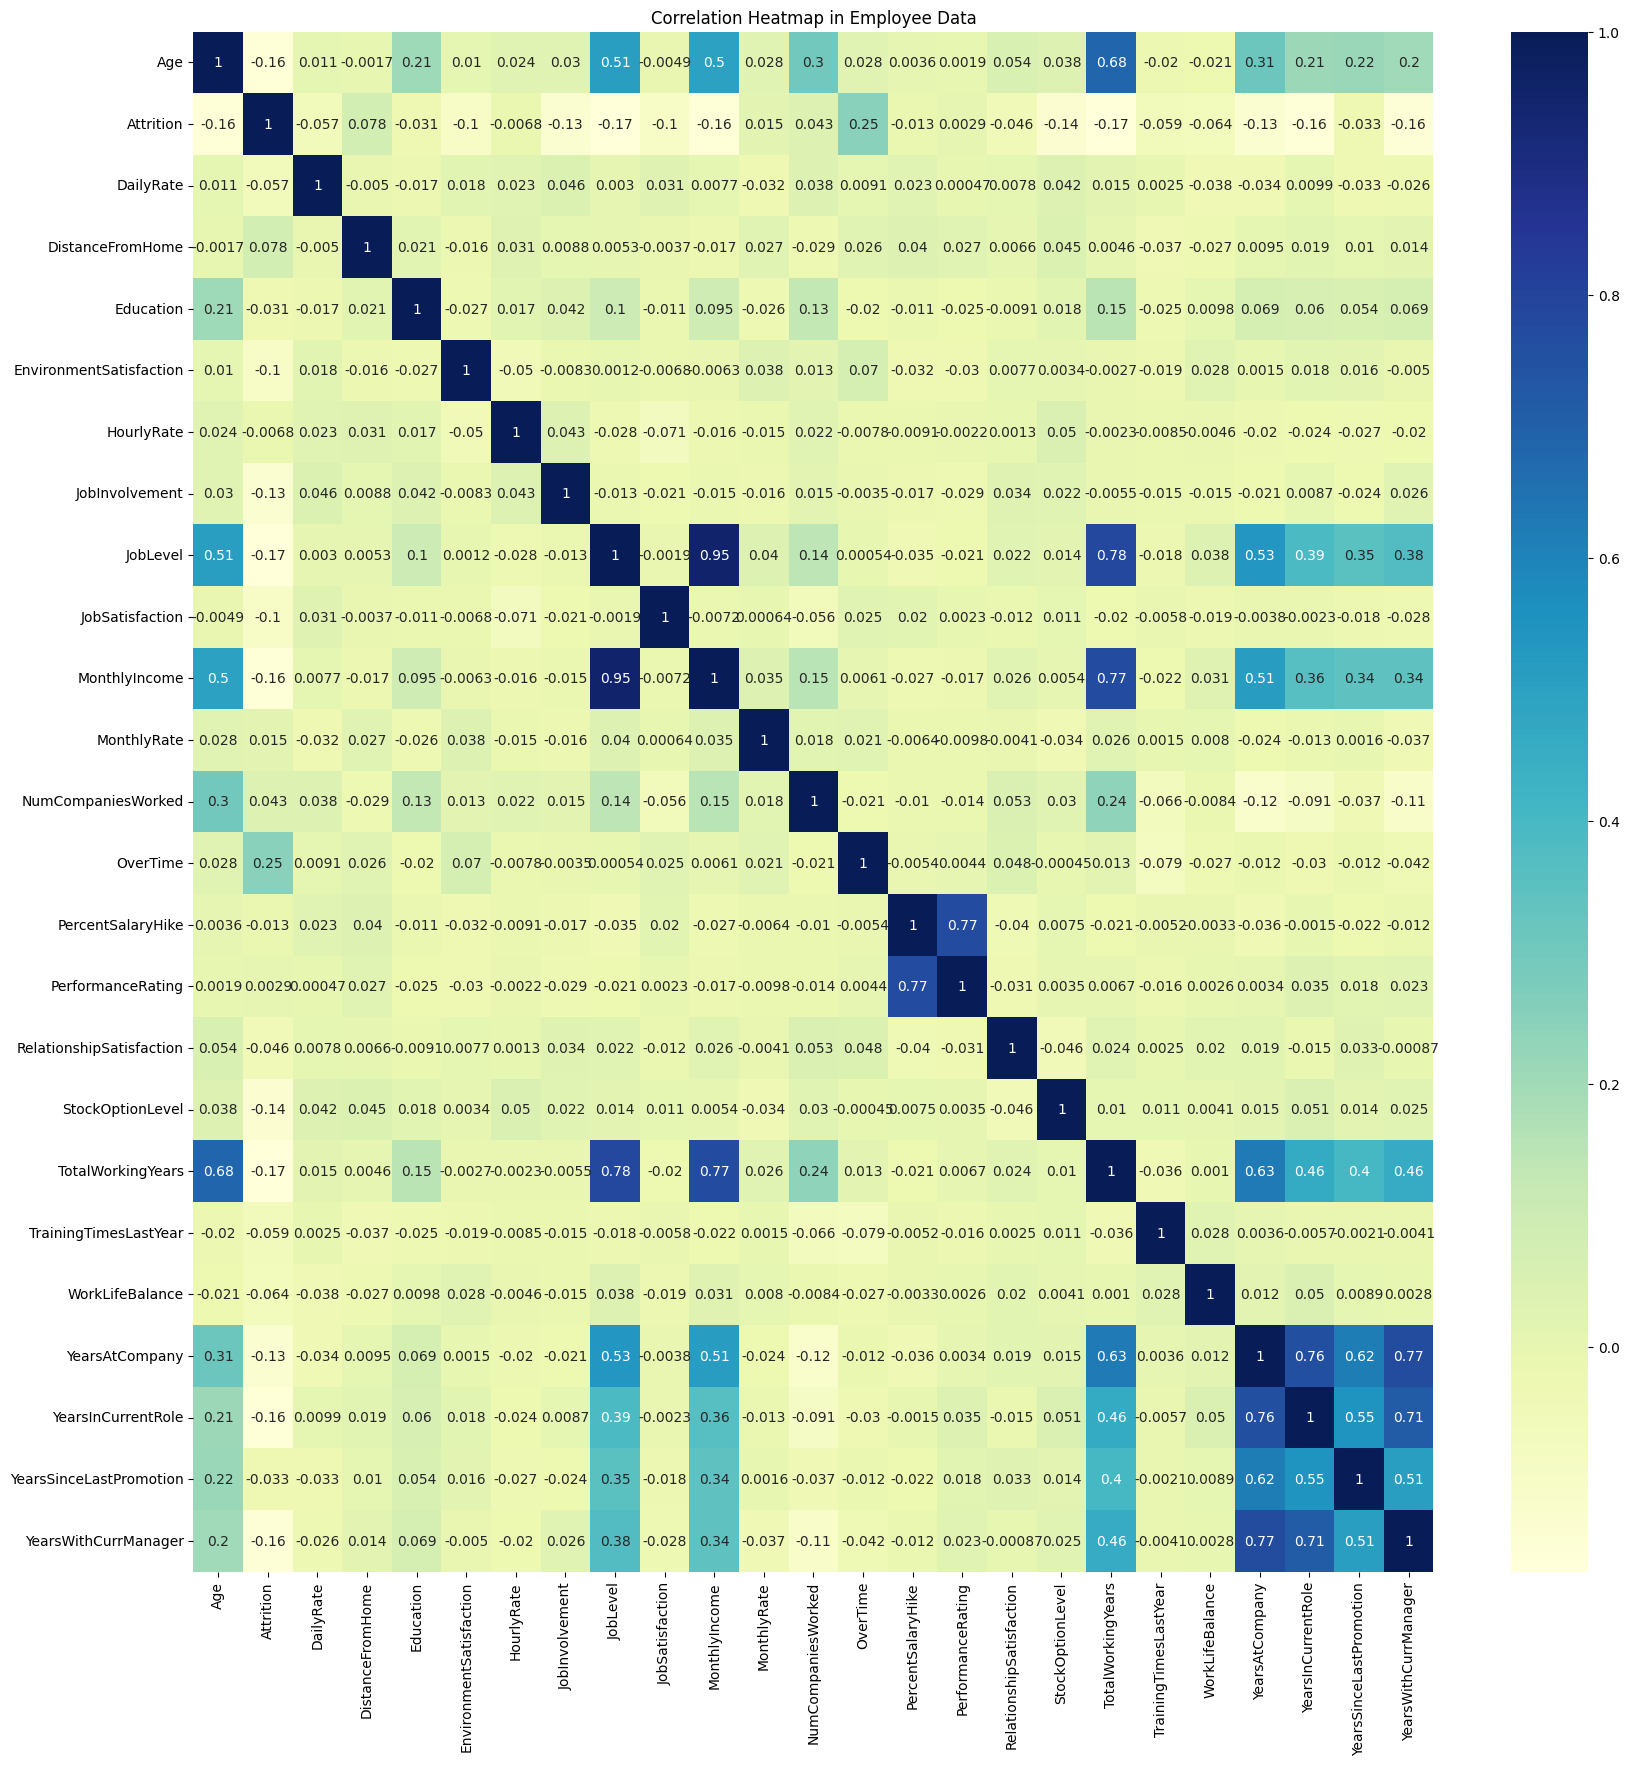

In [ ]:
numeric_columns = employee_df.select_dtypes(include=['int64', 'float64'])
correlations = numeric_columns.corr()
custom_cmap = "YlGnBu"
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlations, annot=True, cmap = custom_cmap)
ax.set_title('Correlation Heatmap in Employee Data')

- Job level is highly correlated with the total number of working hours.
- Monthly income is highly correlated with Job level.
- Monthly income is highly correlated with the total number of working hours.
- Age is highly correlated with monthly income.

This analysis reveals significant correlations among various factors in predicting employee turnover. Job level shows a strong correlation with both total working hours and monthly income, indicating its importance in employee retention strategies. Additionally, monthly income exhibits a strong correlation with both job level and total working hours, emphasizing its role in predicting employee resignations. Moreover, age displays a notable correlation with monthly income, suggesting that older employees tend to have higher incomes, which could influence their decision to leave the company.


Text(0, 0.5, 'Count')

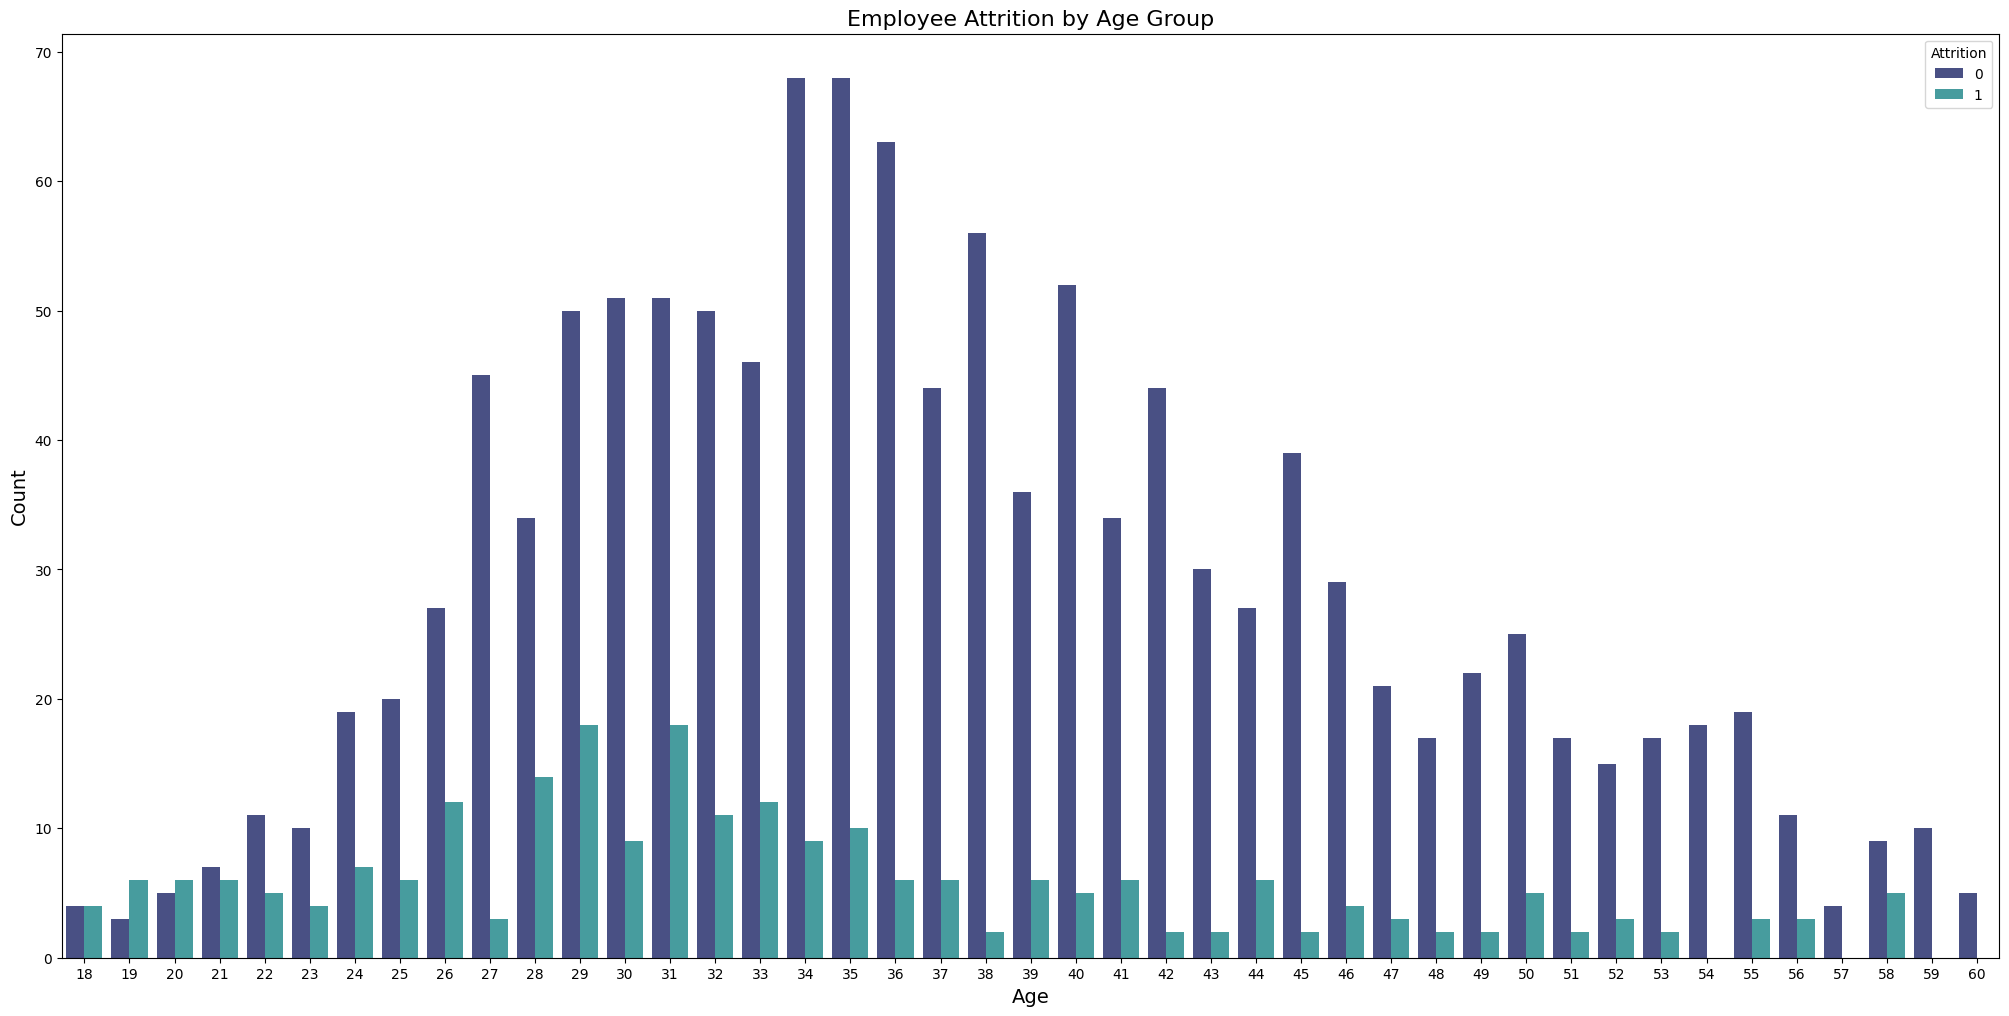

In [ ]:
custom_palette = "mako"
plt.figure(figsize=[25, 12])
sns.countplot(x = 'Age', hue= 'Attrition', data= employee_df, palette = custom_palette)
plt.title('Employee Attrition by Age Group', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Count', fontsize=14)

**Conclusion:**
This analysis reveals that employees between 26 and 33 years old are the most likely to resign from the company.

<ipython-input-19-4a46f4deea08>:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x= 'JobRole', hue= 'Attrition', data= employee_df, palette = custom_palette)
<ipython-input-19-4a46f4deea08>:9: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x= 'MaritalStatus', hue= 'Attrition', data= employee_df, palette = custom_palette)
<ipython-input-19-4a46f4deea08>:13: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x= 'JobInvolvement', hue= 'Attrition', data= employee_df, palette = custom_palette)
<ipython-input-19-4a46f4deea08>:17: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(x= 'JobLevel', hue= 'Attrition', data= employee_df, palette = custom_palette)


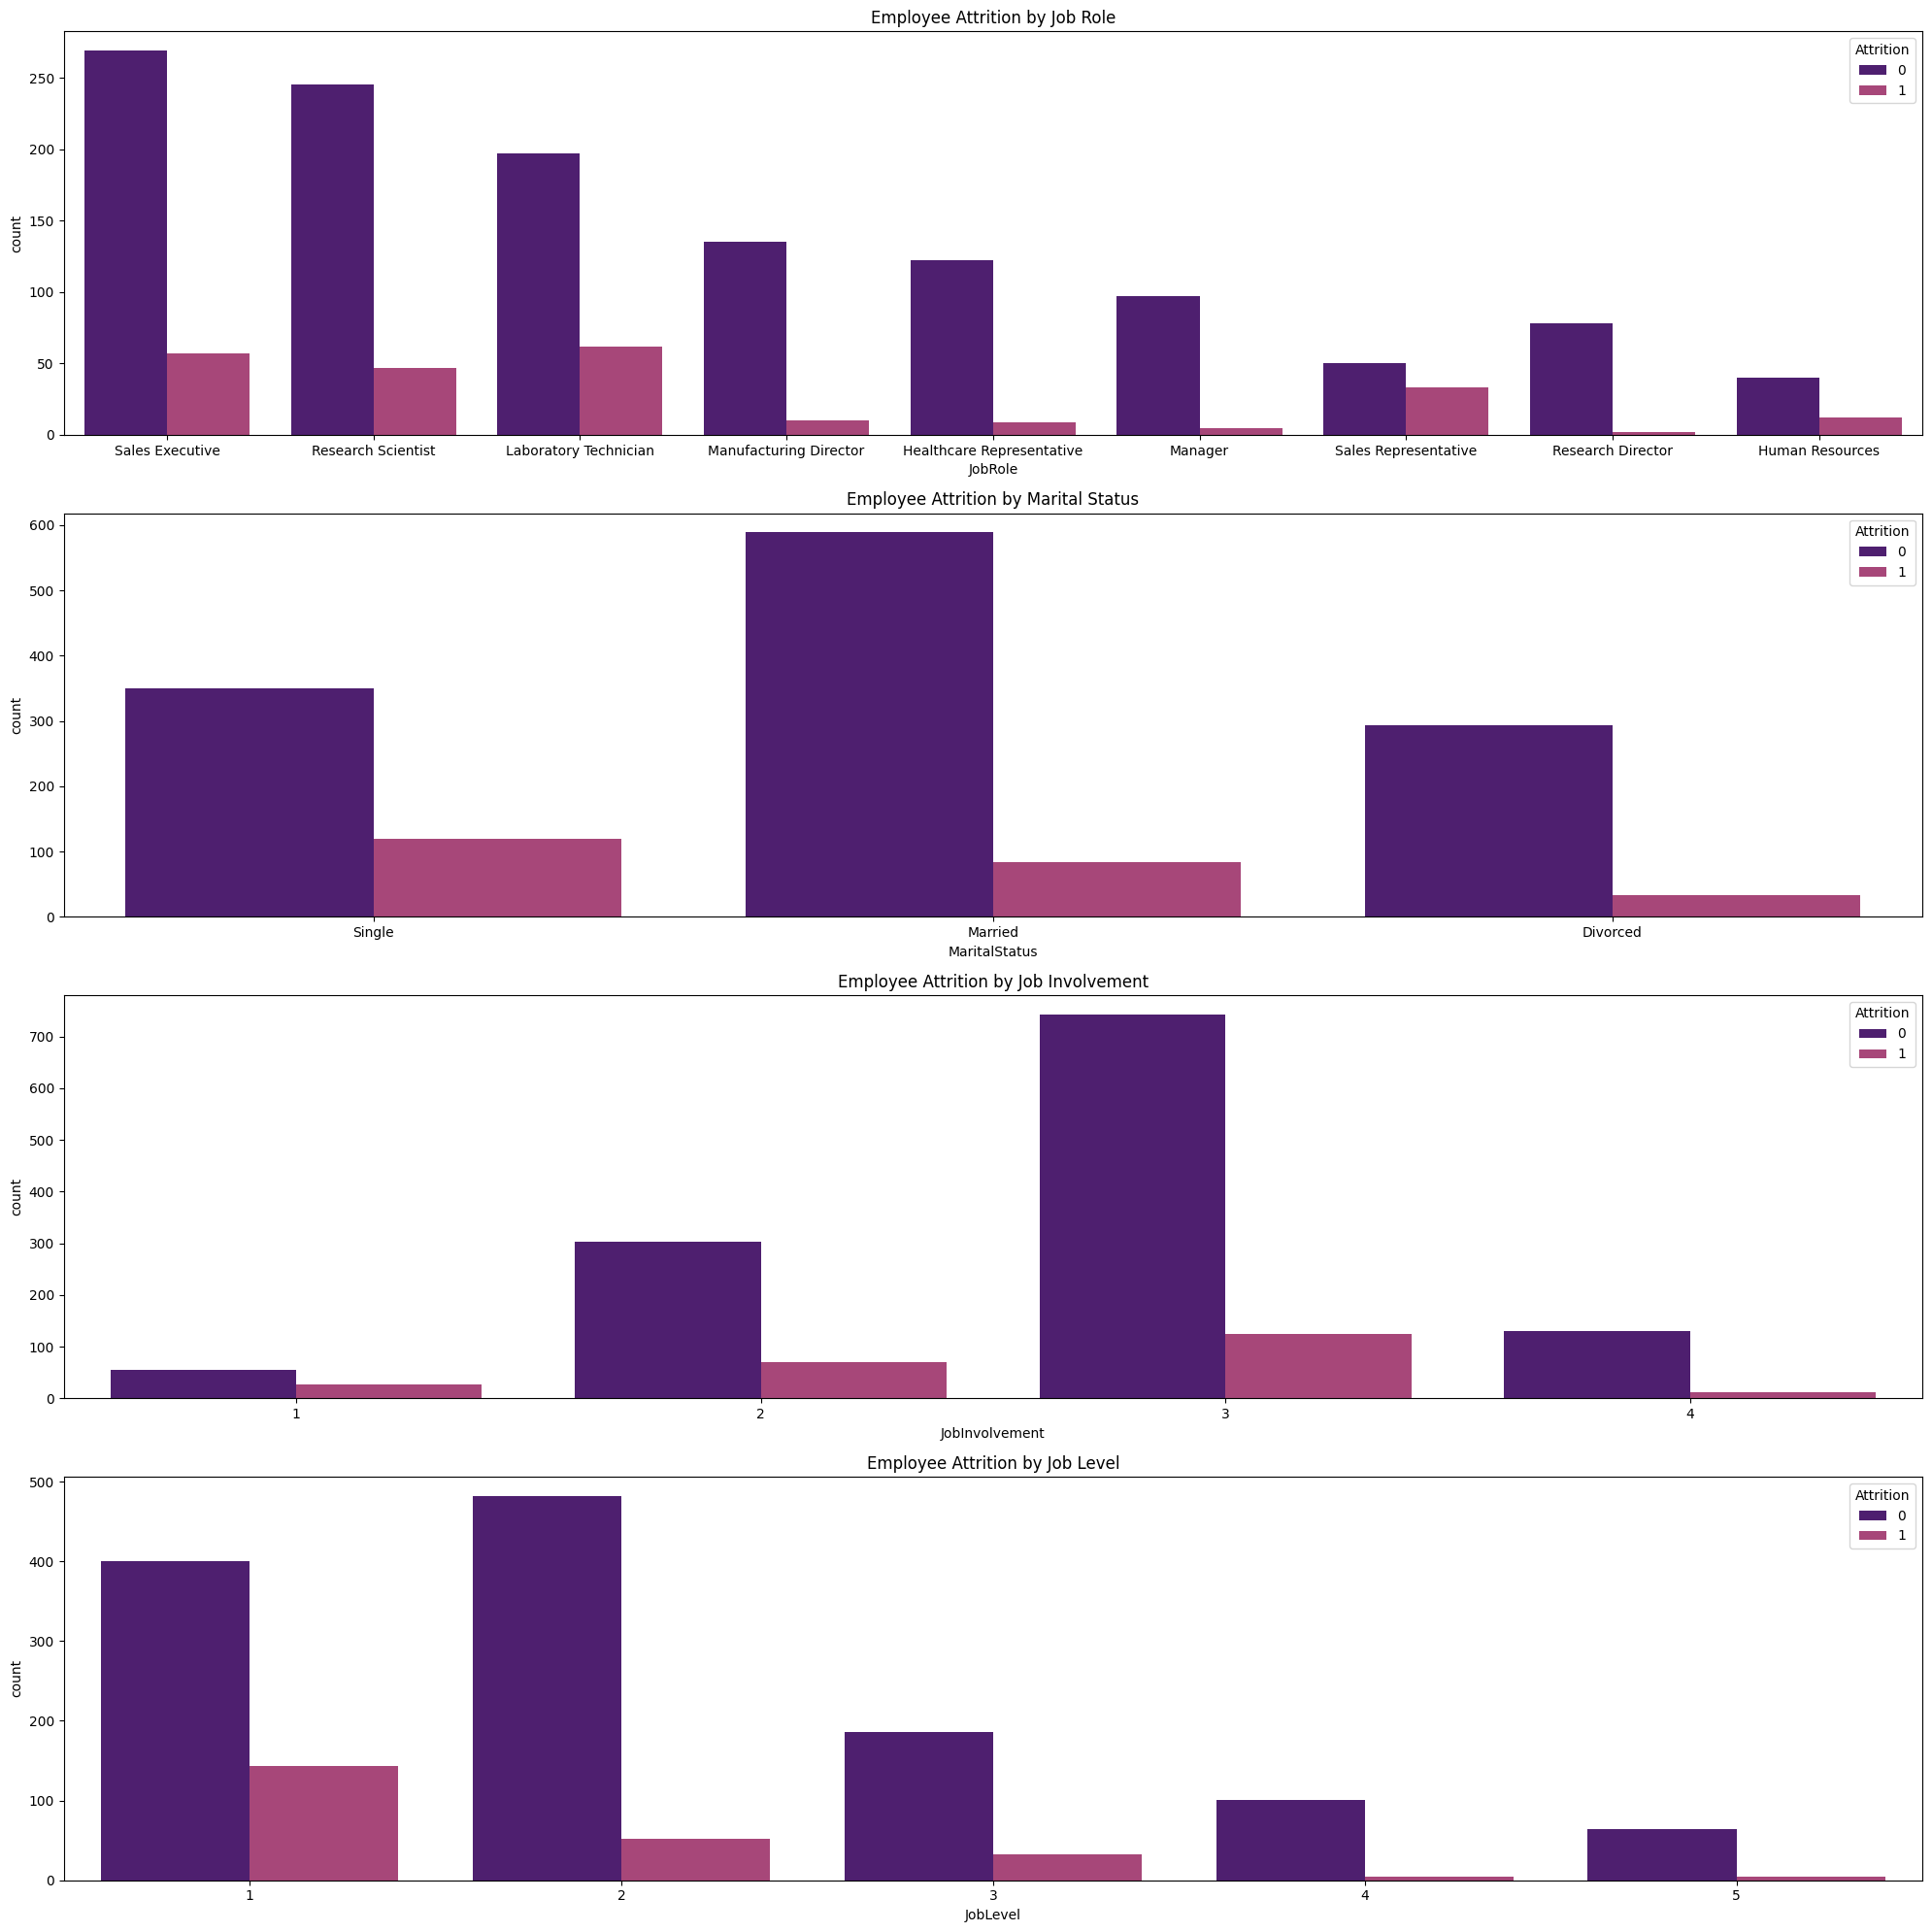

In [ ]:
custom_palette = sns.color_palette("magma", 3)
plt.figure(figsize= [20, 20])

plt.subplot(411)
sns.countplot(x= 'JobRole', hue= 'Attrition', data= employee_df, palette = custom_palette)
plt.title('Employee Attrition by Job Role')

plt.subplot(412)
sns.countplot(x= 'MaritalStatus', hue= 'Attrition', data= employee_df, palette = custom_palette)
plt.title('Employee Attrition by Marital Status')

plt.subplot(413)
sns.countplot(x= 'JobInvolvement', hue= 'Attrition', data= employee_df, palette = custom_palette)
plt.title('Employee Attrition by Job Involvement')

plt.subplot(414)
sns.countplot(x= 'JobLevel', hue= 'Attrition', data= employee_df, palette = custom_palette)
plt.title('Employee Attrition by Job Level')

plt.tight_layout()

- Single employees tend to leave compared to married and divorced ones.
- Sales representatives tend to leave compared to any other job.
- Less engaged employees tend to leave the company.
- Less experienced employees (low-level job) tend to leave the company.

**Conclusion:**
This analysis reveals certain patterns regarding employee turnover. Being single, employment as a sales representative, lower levels of engagement, and less experience are identified as important factors contributing to employee burnout. Understanding and addressing these factors can be crucial to developing retention strategies within organizations.

<ipython-input-20-6e5a9841b2f0>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['DistanceFromHome'], label= 'Employees who resign', shade= True, color= 'g')
<ipython-input-20-6e5a9841b2f0>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Employees who stay', shade= True, color= 'b')


Text(0.5, 1.0, 'Distance from home to work')

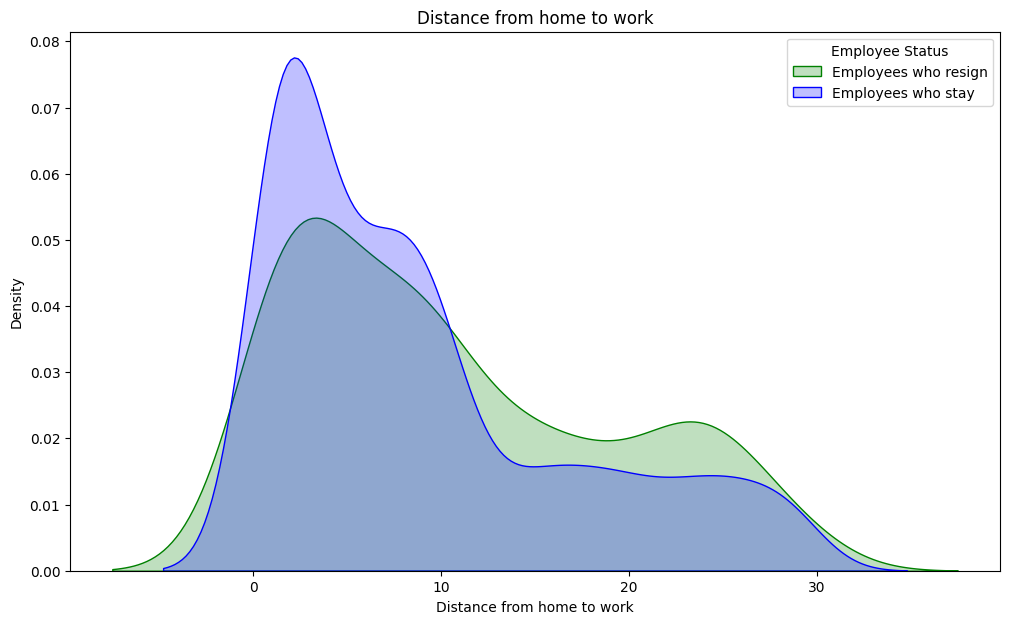

In [ ]:
plt.figure(figsize= [12, 7])
sns.kdeplot(left_df['DistanceFromHome'], label= 'Employees who resign', shade= True, color= 'g')
sns.kdeplot(stayed_df['DistanceFromHome'], label= 'Employees who stay', shade= True, color= 'b')
plt.xlabel('Distance from home to work')
plt.ylabel('Density')
plt.legend(title='Employee Status')
plt.xlabel('Distance from home to work')
plt.title('Distance from home to work')

<ipython-input-21-c51ced19e3ea>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['YearsWithCurrManager'], label= 'Employees who resign', shade= True, color= 'r')
<ipython-input-21-c51ced19e3ea>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['YearsWithCurrManager'], label= 'Employees who stay', shade= True, color= 'b')


Text(0.5, 1.0, 'Years with your current Manager')

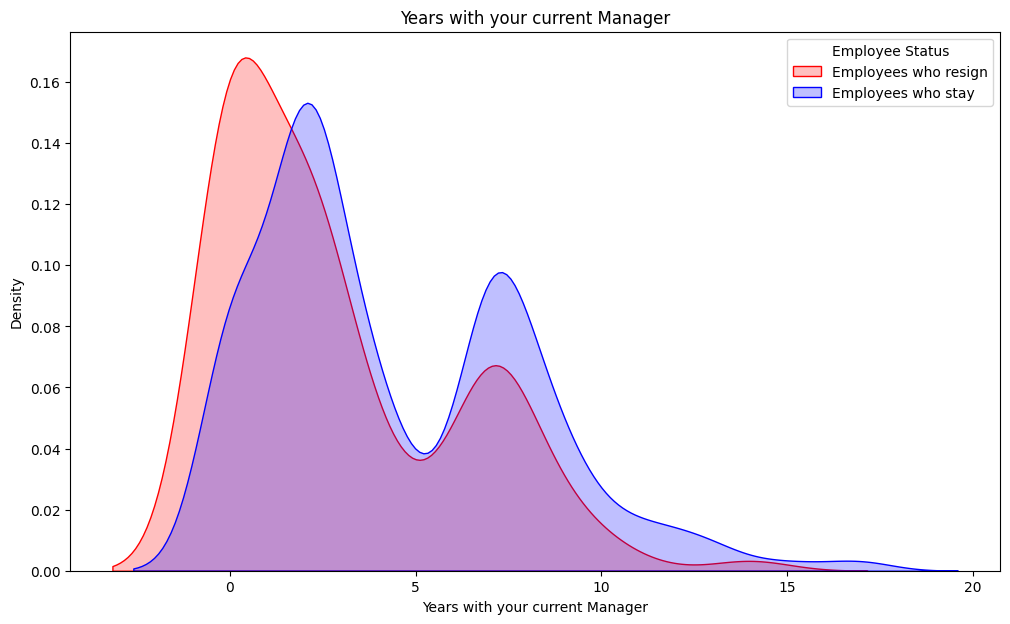

In [ ]:
plt.figure(figsize= [12, 7])
sns.kdeplot(left_df['YearsWithCurrManager'], label= 'Employees who resign', shade= True, color= 'r')
sns.kdeplot(stayed_df['YearsWithCurrManager'], label= 'Employees who stay', shade= True, color= 'b')
plt.xlabel('Distance from home to work')
plt.ylabel('Density')
plt.legend(title='Employee Status')
plt.xlabel('Years with your current Manager')
plt.title('Years with your current Manager')

<ipython-input-22-d9baf6627378>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(left_df['TotalWorkingYears'], label= 'Employees who resign', shade= True, color= 'y')
<ipython-input-22-d9baf6627378>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Employees who stay', shade= True, color= 'b')


Text(0.5, 1.0, 'Total number of years of work')

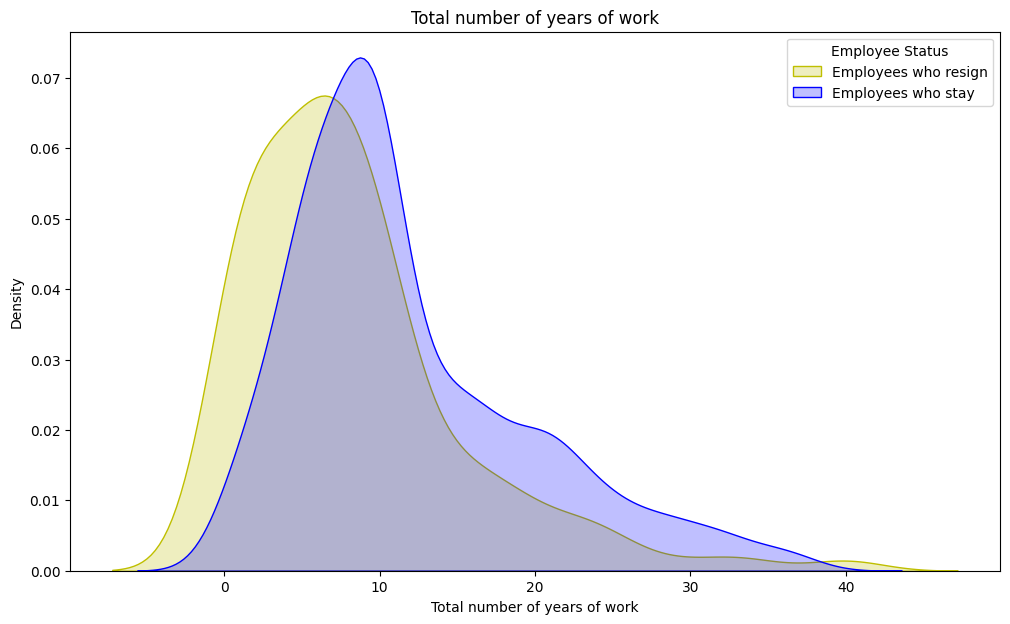

In [ ]:
plt.figure(figsize= [12, 7])
sns.kdeplot(left_df['TotalWorkingYears'], label= 'Employees who resign', shade= True, color= 'y')
sns.kdeplot(stayed_df['TotalWorkingYears'], label= 'Employees who stay', shade= True, color= 'b')
plt.xlabel('Distance from home to work')
plt.ylabel('Density')
plt.legend(title='Employee Status')
plt.xlabel('Total number of years of work')
plt.title('Total number of years of work')

<ipython-input-23-2ad7e131d5bf>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x= 'MonthlyIncome', y= 'Gender', data= employee_df, palette = custom_palette)
<ipython-input-23-2ad7e131d5bf>:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.boxplot(x= 'MonthlyIncome', y= 'Gender', data= employee_df, palette = custom_palette)


Text(0.5, 1.0, 'Monthly Income by Gender')

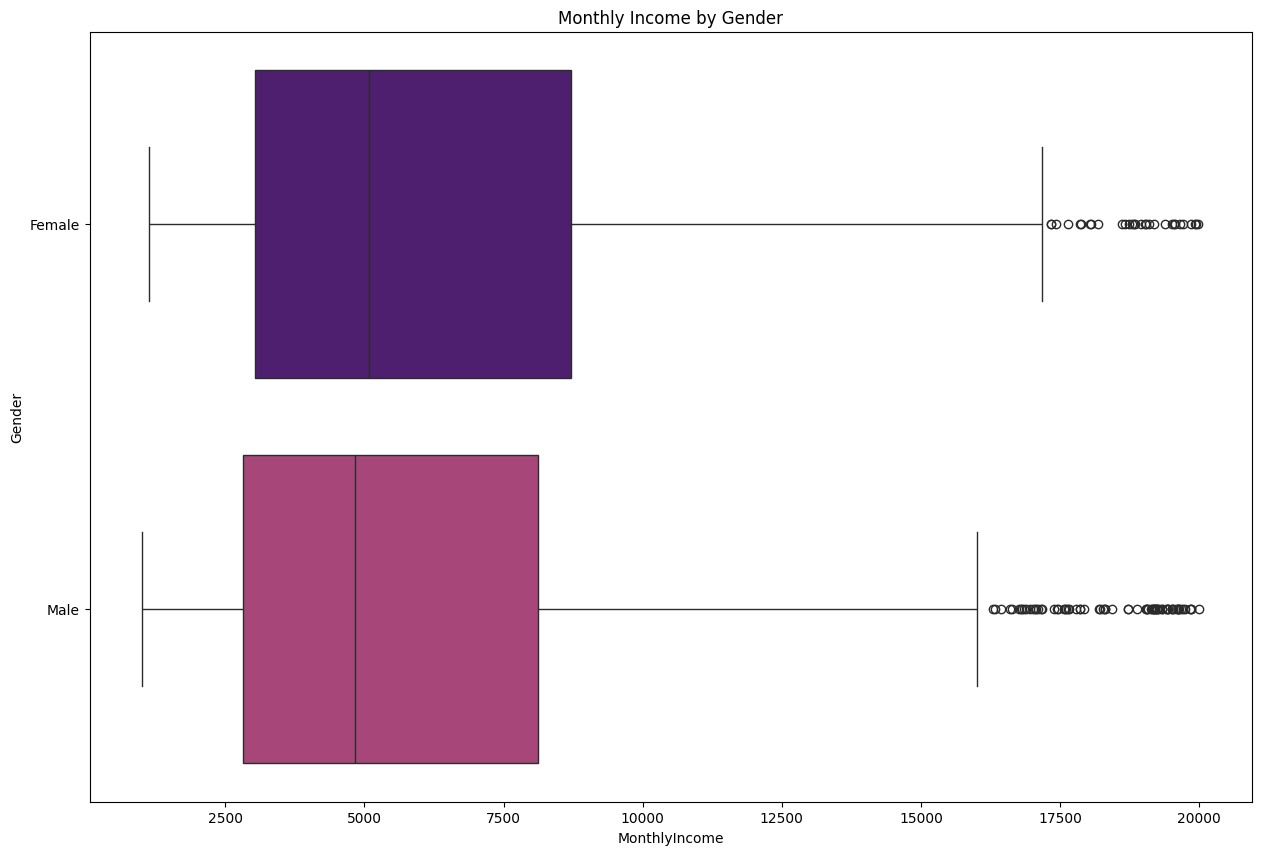

In [ ]:
plt.figure(figsize= [15, 10])
sns.boxplot(x= 'MonthlyIncome', y= 'Gender', data= employee_df, palette = custom_palette)
plt.title('Monthly Income by Gender')

<ipython-input-24-bf3aff4a7d08>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df, palette=custom_palette1)


Text(0.5, 1.0, 'Monthly Income by Job Role')

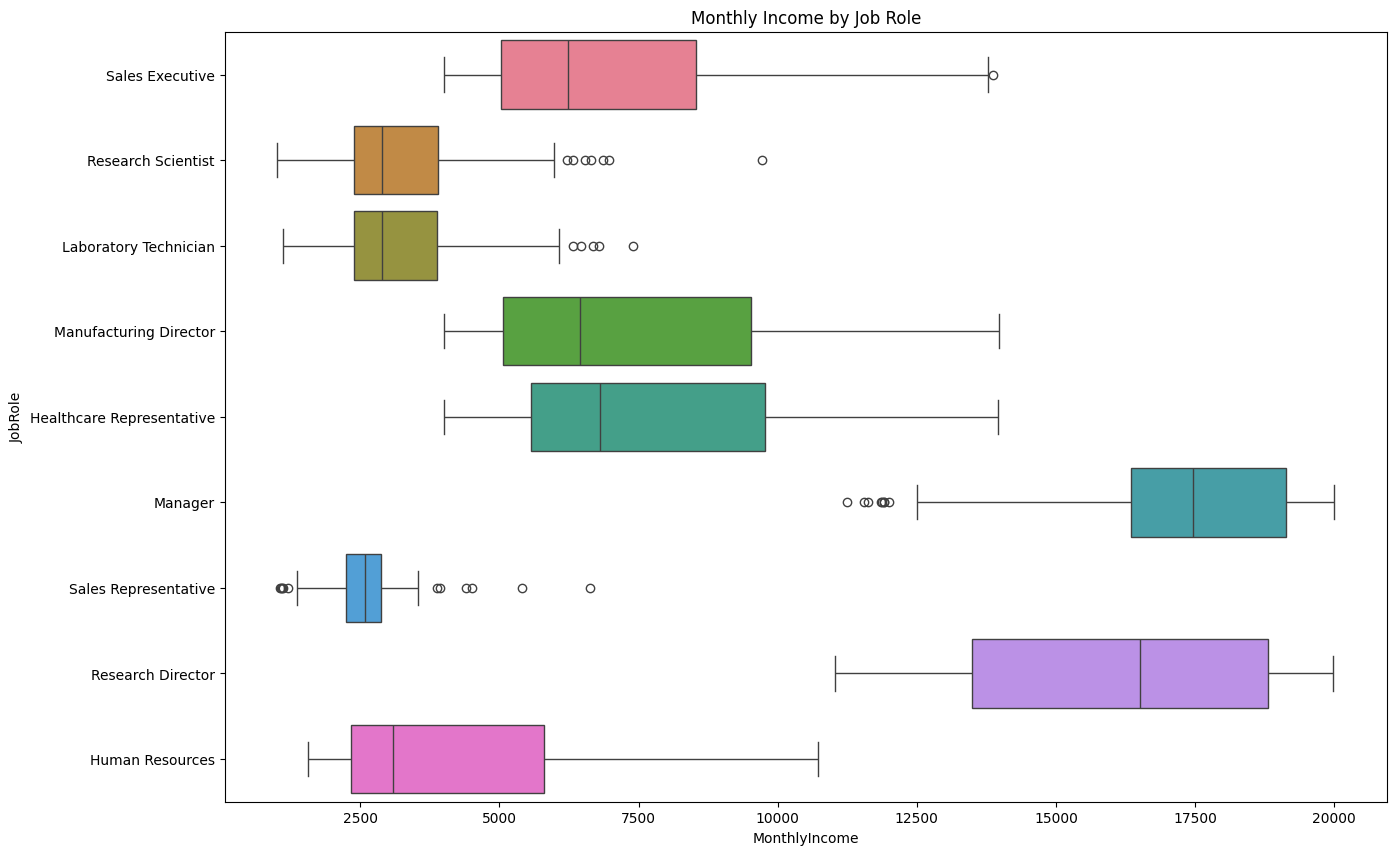

In [ ]:
custom_palette1 = "husl"
plt.figure(figsize=[15, 10])
sns.boxplot(x='MonthlyIncome', y='JobRole', data=employee_df, palette=custom_palette1)
plt.title('Monthly Income by Job Role')

# Data Preparation For Modeling

## Categorical Variable (x)

In [ ]:
X_cat = employee_df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [ ]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
onehotencoder = OneHotEncoder()
X_cat = onehotencoder.fit_transform(X_cat).toarray()

In [ ]:
X_cat.shape

(1470, 26)

In [ ]:
 X_cat = pd.DataFrame(X_cat)
 X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
# Notemos que hemos elminado la columna target, 'Atrittion'
X_numerical = employee_df[['Age', 'DailyRate', 'DistanceFromHome',	'Education', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement',	'JobLevel',	'JobSatisfaction',	'MonthlyIncome',	'MonthlyRate',	'NumCompaniesWorked',	'OverTime',	'PercentSalaryHike', 'PerformanceRating',	'RelationshipSatisfaction',	'StockOptionLevel',	'TotalWorkingYears'	,'TrainingTimesLastYear'	, 'WorkLifeBalance',	'YearsAtCompany'	,'YearsInCurrentRole', 'YearsSinceLastPromotion',	'YearsWithCurrManager']]
X_numerical

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
X_all = pd.concat([X_cat, X_numerical], axis = 1)
X_all

,0,1,2,3,4,5,6,7,8,9,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,3,1,0,8,0,1,6,4,0,5
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,4,1,10,3,3,10,7,1,7
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,3,2,0,7,3,3,0,0,0,0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,3,3,0,8,3,3,8,7,3,0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,3,1,17,3,3,5,2,0,3
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,3,1,1,9,5,3,7,7,1,7
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,4,2,1,6,0,3,6,2,0,3
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
scaler = MinMaxScaler()
X_all.columns = X_all.columns.astype(str)
X = scaler.fit_transform(X_all)

In [ ]:
X

array([[0.        , 0.        , 1.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.        , 1.        , 0.        , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.        , ..., 0.11111111, 0.        ,
        0.17647059],
       [0.        , 1.        , 0.        , ..., 0.33333333, 0.        ,
        0.47058824],
       [0.        , 0.        , 1.        , ..., 0.16666667, 0.06666667,
        0.11764706]])

## Target Variable (y)

In [ ]:
y = employee_df['Attrition']
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Train And Evaluate A Classifier Using Logistic Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
X_train.shape

(1102, 50)

In [ ]:
X_test.shape

(368, 50)

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [ ]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,

Text(0.5, 1.0, 'Confusion Matrix')

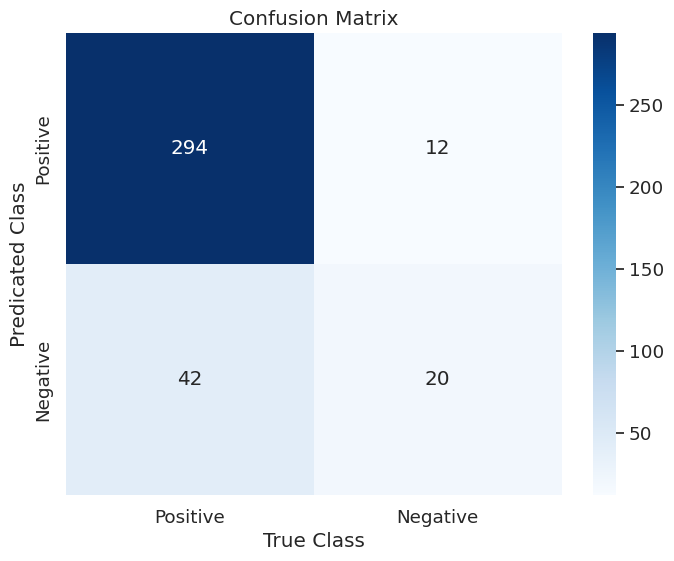

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = ["Positive", "Negative"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('True Class')
plt.ylabel('Predicated Class')
plt.title('Confusion Matrix')

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report['precision'] = df_report['precision'].apply(lambda x: "{:.2%}".format(x))
df_report['recall'] = df_report['recall'].apply(lambda x: "{:.2%}".format(x))
df_report['f1-score'] = df_report['f1-score'].apply(lambda x: "{:.2%}".format(x))

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(df_report)

total_employees = len(y_test)
employees_likely_to_resign = report['1']['support']
resignation_percentage = (employees_likely_to_resign / total_employees) * 100

print("\nSummary:")
print(f"Total number of employees: {total_employees}")
print(f"Number of employees likely to resign: {employees_likely_to_resign}")
print(f"Percentage of employees likely to resign: {resignation_percentage:.2f}%")

Classification Report:
             precision  recall f1-score     support
0               87.50%  96.08%   91.59%  306.000000
1               62.50%  32.26%   42.55%   62.000000
accuracy        85.33%  85.33%   85.33%    0.853261
macro avg       75.00%  64.17%   67.07%  368.000000
weighted avg    83.29%  85.33%   83.33%  368.000000

Summary:
Total number of employees: 368
Number of employees likely to resign: 62
Percentage of employees likely to resign: 16.85%


## Main results of the model:

The results reveal that, of the **368** employees evaluated, it is estimated that **51** could resign, which represents approximately **13.86%** of the total workforce.

## Model Accuracy:

The model's accuracy is **89.68%** for predicting employees who will not quit, while it has a lower accuracy of **78.95%** for those who are likely to quit.

## Implications of the results:

These findings suggest that the model can effectively identify employees who will remain with the company, but faces greater difficulties in accurately predicting who might quit.

# Train And Evaluate A Classifier Using Random Forests

In [ ]:
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

Text(0.5, 1.0, 'Confusion Matrix')

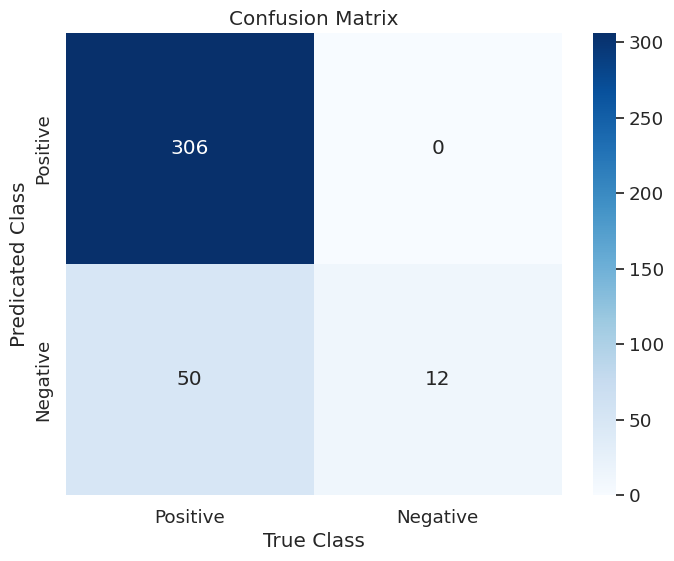

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = ["Positive", "Negative"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('True Class')
plt.ylabel('Predicated Class')
plt.title('Confusion Matrix')

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report['precision'] = df_report['precision'].apply(lambda x: "{:.2%}".format(x))
df_report['recall'] = df_report['recall'].apply(lambda x: "{:.2%}".format(x))
df_report['f1-score'] = df_report['f1-score'].apply(lambda x: "{:.2%}".format(x))

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(df_report)

total_employees = len(y_test)
employees_likely_to_resign = report['1']['support']
resignation_percentage = (employees_likely_to_resign / total_employees) * 100

print("\nSummary:")
print(f"Total number of employees: {total_employees}")
print(f"Number of employees likely to resign: {employees_likely_to_resign}")
print(f"Percentage of employees likely to resign: {resignation_percentage:.2f}%")

Classification Report:
             precision   recall f1-score    support
0               85.96%  100.00%   92.45%  306.00000
1              100.00%   19.35%   32.43%   62.00000
accuracy        86.41%   86.41%   86.41%    0.86413
macro avg       92.98%   59.68%   62.44%  368.00000
weighted avg    88.32%   86.41%   82.34%  368.00000

Summary:
Total number of employees: 368
Number of employees likely to resign: 62
Percentage of employees likely to resign: 16.85%



## Main results of the model:

The Random Forest model predicts with **86.41%** accuracy the likelihood of employees resigning from company.
Out of a total of **368** employees, the model identifies **62** individuals **(16.85%)** as likely to resign.
Precision for predicting employees who will resign is **100%**, but recall is relatively low at **19.35%**.

## Model Accuracy:

The overall accuracy of the Random Forest model is **86.41%**, indicating a relatively reliable prediction capability.
The model performs well in identifying employees who are not likely to resign (precision of **85.96%**), but it struggles to capture those who actually resign (low recall of **19.35%**).

## Implications of the results:

With **16.85%** of employees predicted to resign, the company may face potential talent loss and associated disruptions.
The model's limitation in correctly identifying resigning employees highlights the need for further refinement or additional data inputs to enhance predictive accuracy.
The company can use these insights to implement targeted retention strategies and interventions to mitigate the risk of losing valuable employees.

# Train And Evaluate A Classifier Using Deep Learning

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 500, activation='relu', input_shape=(50, )))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 500, activation='relu'))
model.add(tf.keras.layers.Dense(units = 1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               25500     
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 dense_2 (Dense)             (None, 500)               250500    
                                                                 
 dense_3 (Dense)             (None, 1)                 501       
                                                                 
Total params: 527001 (2.01 MB)
Trainable params: 527001 (2.01 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='Adam', loss = 'binary_crossentropy', metrics=['accuracy'])

In [ ]:
epochs_hist = model.fit(X_train, y_train, epochs = 100, batch_size=50)

Epoch 1/100
23/23 [==============================] - 1s 7ms/step - loss: 0.4244 - accuracy: 0.8149
Epoch 2/100
23/23 [==============================] - 0s 7ms/step - loss: 0.3281 - accuracy: 0.8702
Epoch 3/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2959 - accuracy: 0.8802
Epoch 4/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2569 - accuracy: 0.9074
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2585 - accuracy: 0.9020
Epoch 6/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2285 - accuracy: 0.9102
Epoch 7/100
23/23 [==============================] - 0s 7ms/step - loss: 0.2030 - accuracy: 0.9247
Epoch 8/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1744 - accuracy: 0.9356
Epoch 9/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1386 - accuracy: 0.9492
Epoch 10/100
23/23 [==============================] - 0s 7ms/step - loss: 0.1096 - accuracy: 0.9574
Epoch 11/

In [ ]:
y_pred = model.predict(X_test)
y_pred

12/12 [==============================] - 0s 2ms/step


array([[3.26214060e-02],
       [4.47452757e-13],
       [2.82932120e-12],
       [8.41288705e-11],
       [3.21945325e-02],
       [9.99983609e-01],
       [1.74453767e-12],
       [7.45066330e-02],
       [9.96672153e-01],
       [6.36148856e-10],
       [7.76987581e-04],
       [1.07081100e-08],
       [1.31956468e-11],
       [9.77872312e-01],
       [5.51046242e-07],
       [2.90074930e-13],
       [5.71546810e-10],
       [6.70451704e-13],
       [2.90798111e-04],
       [6.86666071e-11],
       [2.16960472e-09],
       [2.69987678e-11],
       [7.80612339e-08],
       [4.92618613e-10],
       [6.21909302e-10],
       [3.19794164e-20],
       [2.59642637e-11],
       [1.88580034e-05],
       [4.11270952e-14],
       [1.00000000e+00],
       [3.50228380e-09],
       [3.29685572e-17],
       [2.67023593e-01],
       [3.12410819e-04],
       [1.96153111e-11],
       [1.94290595e-04],
       [3.22653779e-11],
       [1.15139154e-13],
       [1.21607320e-08],
       [2.74399237e-04],


In [ ]:
y_pred = (y_pred > 0.5)
y_pred

array([[False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'accuracy'])

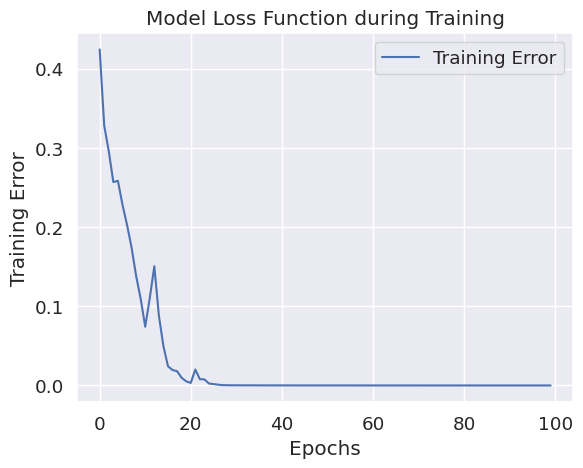

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Function during Training")
plt.xlabel("Epochs")
plt.ylabel("Training Error")
plt.legend(["Training Error"])

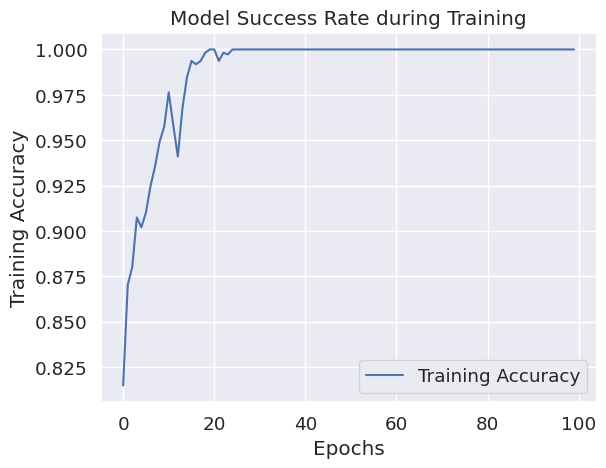

In [ ]:
plt.plot(epochs_hist.history['accuracy'])
plt.title("Model Success Rate during Training")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend(["Training Accuracy"])

Text(0.5, 1.0, 'Confusion Matrix')

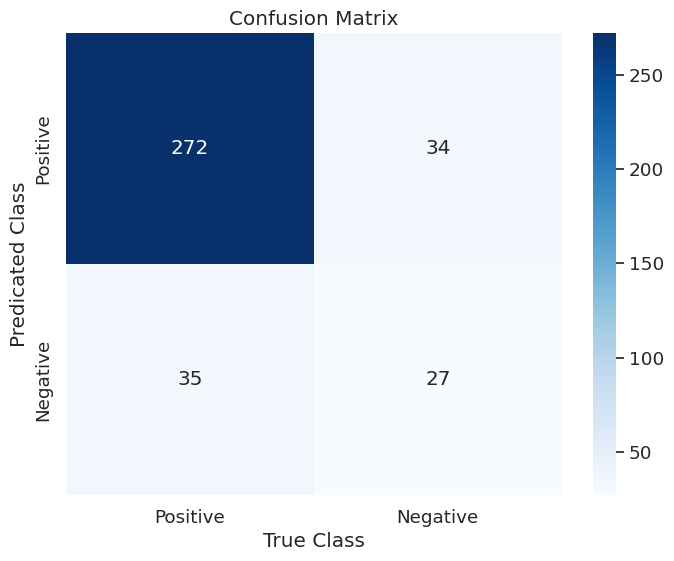

In [ ]:
cm = confusion_matrix(y_test, y_pred)

classes = ["Positive", "Negative"]

plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)

plt.xlabel('True Class')
plt.ylabel('Predicated Class')
plt.title('Confusion Matrix')

In [ ]:
report = classification_report(y_test, y_pred, output_dict=True)

df_report = pd.DataFrame(report).transpose()

df_report['precision'] = df_report['precision'].apply(lambda x: "{:.2%}".format(x))
df_report['recall'] = df_report['recall'].apply(lambda x: "{:.2%}".format(x))
df_report['f1-score'] = df_report['f1-score'].apply(lambda x: "{:.2%}".format(x))

cm = confusion_matrix(y_test, y_pred)

print("Classification Report:")
print(df_report)

total_employees = len(y_test)
employees_likely_to_resign = report['1']['support']
resignation_percentage = (employees_likely_to_resign / total_employees) * 100

print("\nSummary:")
print(f"Total number of employees: {total_employees}")
print(f"Number of employees likely to resign: {employees_likely_to_resign}")
print(f"Percentage of employees likely to resign: {resignation_percentage:.2f}%")

Classification Report:
             precision  recall f1-score   support
0               88.60%  88.89%   88.74%  306.0000
1               44.26%  43.55%   43.90%   62.0000
accuracy        81.25%  81.25%   81.25%    0.8125
macro avg       66.43%  66.22%   66.32%  368.0000
weighted avg    81.13%  81.25%   81.19%  368.0000

Summary:
Total number of employees: 368
Number of employees likely to resign: 62
Percentage of employees likely to resign: 16.85%



## Main results of the model:
The deep learning prediction model successfully identified employees likely to resign with a precision of **88.60%** for non-resigning employees and **44.26%** for resigning employees. This indicates a moderate level of accuracy in predicting employee turnover.

## Model Accuracy:
The overall accuracy of the model stands at **81.25%**, suggesting a satisfactory performance in distinguishing between employees likely to stay and those likely to resign. However, there is room for improvement in accurately identifying resigning employees, as reflected in the lower precision and recall scores for this category.

## Implications of the results:
Out of a total of **368** employees, the model predicts that **62** employees are likely to resign. This represents approximately **16.85%** of the workforce, highlighting the significance of addressing retention strategies to mitigate potential turnover and its associated impacts on organizational stability and productivity. Further refinement of the model could enhance its predictive capabilities and support proactive measures to retain valuable talent within the company.